In [130]:
# Libraries
#List down here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from scipy.stats import gmean
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import BayesianRidge


In [131]:
data = pd.read_csv('train.csv')
data.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
surface_area,120540.0,752610.0,1396.0,2758812.0,340.0
agricultural_land,2632839.465438,24030389.105693,3000.0,122884535.217072,11000.000001
forest_area,5417843.036231,49575535.051996,80.0,105094302.736211,16990.000002
armed_forces_total,1379000.0,16500.0,NaN,1518650.0,NaN
urban_pop_major_cities,55.747169,16.890687,18.39009,50.966885,5.311885
urban_pop_minor_cities,4.688831,23.136313,23.13991,24.522427,30.271115
national_income,unknown,very low,unknown,high,unknown
inflation_annual,NaN,NaN,NaN,1.374906,-0.044229
inflation_monthly,NaN,0.581473,NaN,NaN,NaN


In [132]:
data.shape

(362, 17)

In [133]:
data.columns

Index(['Unnamed: 0', 'surface_area', 'agricultural_land', 'forest_area',
       'armed_forces_total', 'urban_pop_major_cities',
       'urban_pop_minor_cities', 'national_income', 'inflation_annual',
       'inflation_monthly', 'inflation_weekly', 'mobile_subscriptions',
       'internet_users', 'secure_internet_servers_total',
       'improved_sanitation', 'women_parliament_seats_rate',
       'life_expectancy'],
      dtype='object')

In [134]:
data.describe()

,Unnamed: 0,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,inflation_annual,inflation_monthly,inflation_weekly,secure_internet_servers_total,life_expectancy
count,362.000000,3.620000e+02,3.580000e+02,3.570000e+02,3.180000e+02,360.000000,360.000000,146.000000,156.000000,20.000000,3.520000e+02,362.000000
mean,231.455801,4.021884e+06,1.594881e+08,1.204151e+08,9.849864e+05,27.659456,29.175242,1.681539,0.475969,0.396478,2.949654e+08,71.059691
std,134.799202,1.234491e+07,4.964143e+08,3.796623e+08,2.994686e+06,20.512885,21.206494,0.980308,0.153430,0.203583,7.234006e+08,8.332818
min,0.000000,3.030000e+01,3.000000e+02,0.000000e+00,5.000000e+01,0.091444,0.074575,-2.372263,0.250543,0.209993,4.002500e+04,48.850634
25%,116.250000,2.783000e+04,1.054198e+06,4.951445e+05,1.218000e+04,10.624625,11.013743,1.202953,0.347799,0.232118,3.468446e+06,65.469854
50%,233.500000,2.037745e+05,5.360256e+06,3.928535e+06,5.352500e+04,24.459439,26.735127,1.762683,0.459790,0.297938,2.671228e+07,73.238024
75%,349.750000,1.081610e+06,4.221935e+07,2.241297e+07,2.598000e+05,38.587177,43.499418,2.485675,0.577340,0.537541,2.173937e+08,77.125610
max,461.000000,1.343253e+08,5.067600e+09,4.132117e+09,2.720662e+07,92.409069,89.142904,2.997694,0.810152,0.781527,8.207343e+09,83.480488


In [135]:
data.dtypes

Unnamed: 0                         int64
surface_area                     float64
agricultural_land                float64
forest_area                      float64
armed_forces_total               float64
urban_pop_major_cities           float64
urban_pop_minor_cities           float64
national_income                   object
inflation_annual                 float64
inflation_monthly                float64
inflation_weekly                 float64
mobile_subscriptions              object
internet_users                    object
secure_internet_servers_total    float64
improved_sanitation               object
women_parliament_seats_rate       object
life_expectancy                  float64
dtype: object

In [136]:
data.head()

,Unnamed: 0,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


In [137]:
data.tail()

,Unnamed: 0,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
357,457,243610.0,1.736999e+07,3.131596e+06,159150.0,42.818424,39.273576,high,2.554547,NaN,NaN,more than 1 per person,90 per 100 people,1.193275e+09,very high access,[0%-25%),80.956098
358,458,9831510.0,4.357576e+08,3.326943e+08,1433150.0,22.948363,58.328637,very high,1.464833,NaN,NaN,less than 1 per person,84 per 100 people,1.304449e+09,very high access,[0%-25%),78.841463
359,459,176220.0,1.446148e+07,1.811858e+06,25450.0,92.409069,2.573931,medium high,NaN,0.714595,NaN,more than 1 per person,58 per 100 people,7.511805e+07,very high access,[0%-25%),76.836195
360,460,330972.0,1.160670e+07,1.549346e+07,522000.0,27.411815,4.897185,low,NaN,0.549355,NaN,more than 1 per person,44 per 100 people,8.159726e+06,medium access,[0%-25%),75.756488
361,461,350.0,4.000000e+03,1.782000e+04,NaN,32.291719,62.772281,unknown,NaN,NaN,NaN,unknown,45 per 100 people,4.010044e+08,very high access,unknown,79.624390


In [138]:
# columns with missing values
data.columns[data.isnull().any()]

Index(['agricultural_land', 'forest_area', 'armed_forces_total',
       'urban_pop_major_cities', 'urban_pop_minor_cities', 'inflation_annual',
       'inflation_monthly', 'inflation_weekly',
       'secure_internet_servers_total'],
      dtype='object')

In [139]:
data.isnull().sum()

Unnamed: 0                         0
surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

Correlation value:  0.9835764656058498


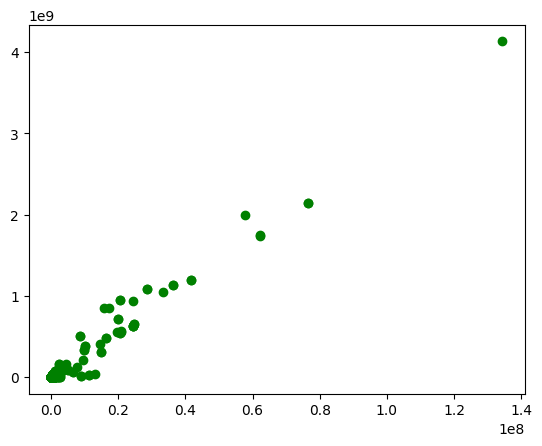

In [140]:
# we have zero missing values in surface_area colum and to see how much it is correlated with forest_area 
# we will plot a scatter plot and we will find correlation. 
# Having high correlation means that surface_area is a good predictor for forest_area

plt.scatter(data['surface_area'], data['forest_area'], color='green')

surface_area_forest_area_corr = data['surface_area'].corr(data['forest_area'])
print("Correlation value: ", surface_area_forest_area_corr)


R2 Score: 0.9720031519235981


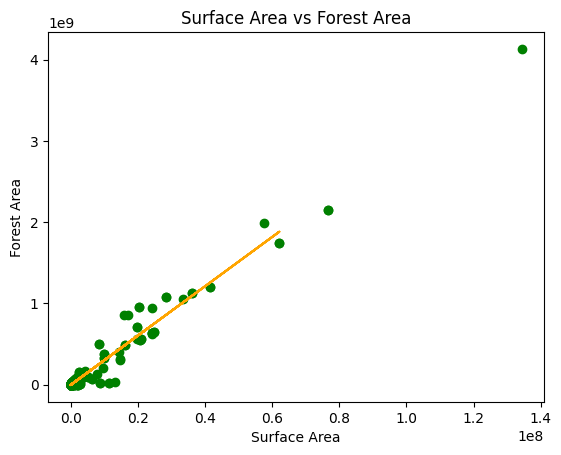

In [141]:
# since we have high correlation between surface_area and forest_area we can use linear regression to predict forest_area
data_copy = data.copy()

data_copy.dropna(subset=['surface_area', 'forest_area'], inplace=True)

X = data_copy['surface_area'].values.reshape(-1, 1)
y = data_copy['forest_area'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# ploting the regression line 
plt.scatter(X, y, color='green')
plt.plot(X_test, y_pred, color='orange')
plt.xlabel('Surface Area')
plt.ylabel('Forest Area')
plt.title('Surface Area vs Forest Area')
plt.show()



In [142]:
# Fill missing values in forest_area column using surface_area column
data['forest_area'] = data.apply(
    lambda row: lr.predict([[row['surface_area']]])[0] if np.isnan(row['forest_area']) else row['forest_area'],
    axis=1
)

Correlation value:  0.9872561341506503


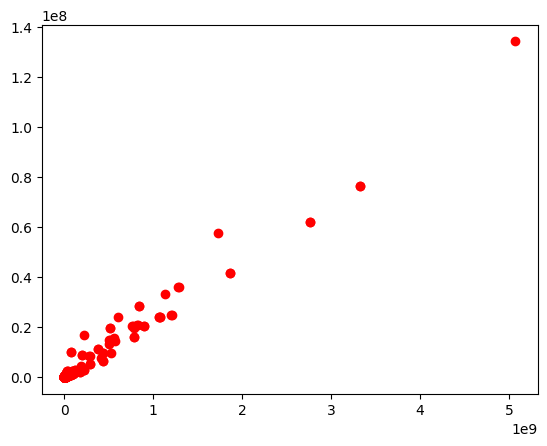

In [143]:
# Ploting the scatter plot between agriculture_area and surface_area
# Checking the correlation between agriculture_area and surface_area

plt.scatter(data['agricultural_land'], data['surface_area'], color='red')
agriculture_area_surface_area_corr = data['agricultural_land'].corr(data['surface_area'])
print("Correlation value: ", agriculture_area_surface_area_corr)

R2 Score: 0.9672326023072718


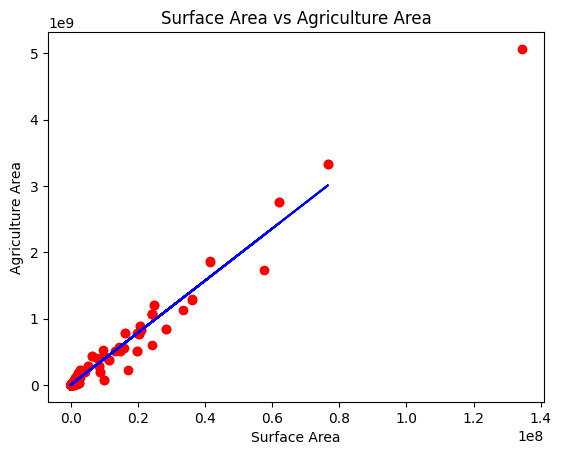

In [144]:
# Getting 0.98 correlation between agriculture_area and surface_area
# we can use linear regression to fill missing values in agriculture_area column
data_copy = data.copy()

data_copy.dropna(subset=['agricultural_land', 'surface_area'], inplace=True)

X = data_copy['surface_area'].values.reshape(-1, 1)
y = data_copy['agricultural_land'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)

# plot the linear regression line
plt.scatter(X, y, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Surface Area vs Agriculture Area')
plt.xlabel('Surface Area')
plt.ylabel('Agriculture Area')
plt.show()

In [145]:
# Fill missing values in agriculture_area column using surface_area column
data['agricultural_land'] = data.apply(
    lambda row: lr.predict([[row['surface_area']]])[0] if np.isnan(row['agricultural_land']) else row['agricultural_land'],
    axis=1
)

Correlation value:  0.9353627656424193


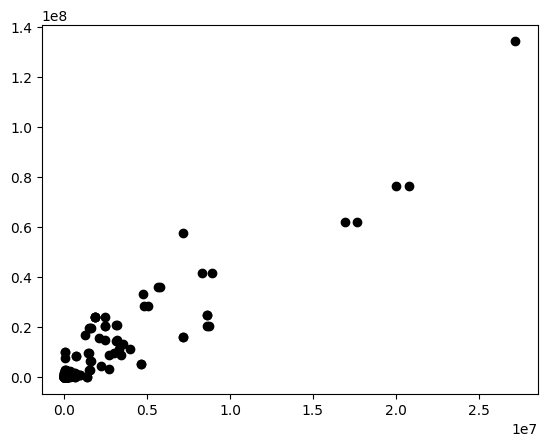

In [146]:
# Ploting the scatter plot between armed_forces_total and surface_area
# Checking the correlation between armed_forces_total and surface_area

plt.scatter(data['armed_forces_total'], data['surface_area'], color='black')

correlation = data['armed_forces_total'].corr(data['surface_area'])
print("Correlation value: " ,correlation)

R2 Score: 0.8654565322512711


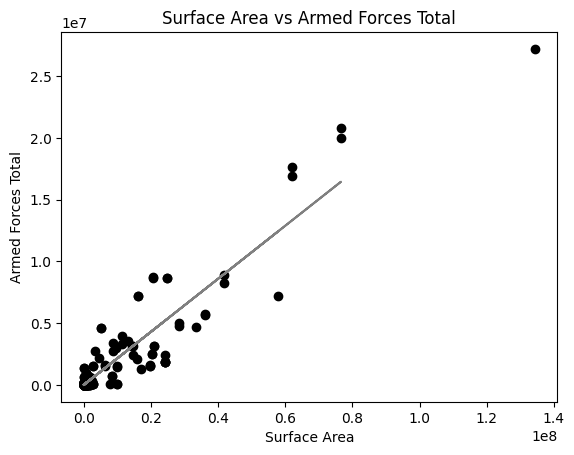

In [147]:
# Getting 0.93 correlation between armed_forces_total and surface_area
# we can use linear regression to fill missing values in armed_forces_total column
data_copy = data.copy()

data_copy.dropna(subset=['armed_forces_total', 'surface_area'], inplace=True)

X = data_copy['surface_area'].values.reshape(-1, 1)

y = data_copy['armed_forces_total'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)

# plot the linear regression line
plt.scatter(X, y, color='black')
plt.plot(X_test, y_pred, color='grey')
plt.title('Surface Area vs Armed Forces Total')
plt.xlabel('Surface Area')
plt.ylabel('Armed Forces Total')
plt.show()

In [148]:
# Fill missing values in armed_forces_total column using surface_area column
data['armed_forces_total'] = data.apply(
    lambda row: lr.predict([[row['surface_area']]])[0] if np.isnan(row['armed_forces_total']) else row['armed_forces_total'],
    axis=1
)

Text(0.5, 1.0, 'Urban Population Major Cities')

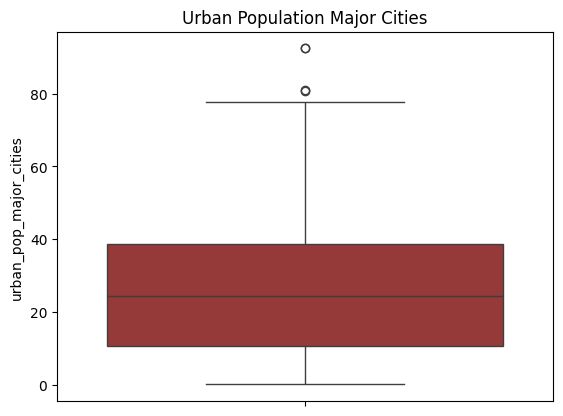

In [149]:
# checking for outliers by plotting boxplot

sns.boxplot(data['urban_pop_major_cities'], color="brown")
plt.title('Urban Population Major Cities')

In [150]:
# since we have outliers in urban_pop_major_cities column, we will use geometric mean to fill missing values
urban_pop_major_cities = data['urban_pop_major_cities']

urban_pop_major_cities = urban_pop_major_cities.dropna()

geometric_mean = gmean(urban_pop_major_cities)

data['urban_pop_major_cities'] = data['urban_pop_major_cities'].fillna(geometric_mean)

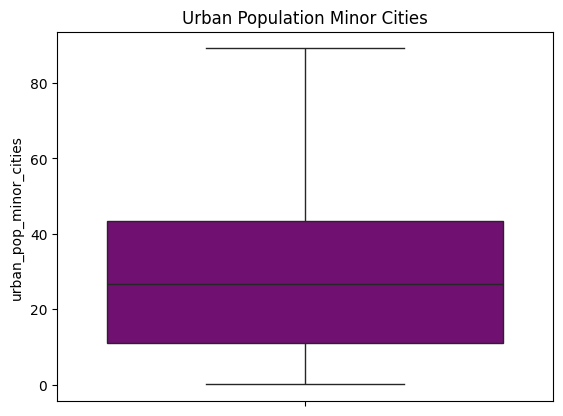

In [151]:
# checking for outliers by plotting boxplot

sns.boxplot(data['urban_pop_minor_cities'], color='purple')
plt.title('Urban Population Minor Cities')
plt.show()


In [152]:
# since no outliers in urban_pop_minor_cities column, we will use mean to fill missing values
urban_pop_minor_cities = data['urban_pop_minor_cities']

urban_pop_minor_cities = urban_pop_minor_cities.dropna()

mean = urban_pop_minor_cities.mean()

data['urban_pop_minor_cities'] = data['urban_pop_minor_cities'].fillna(mean)


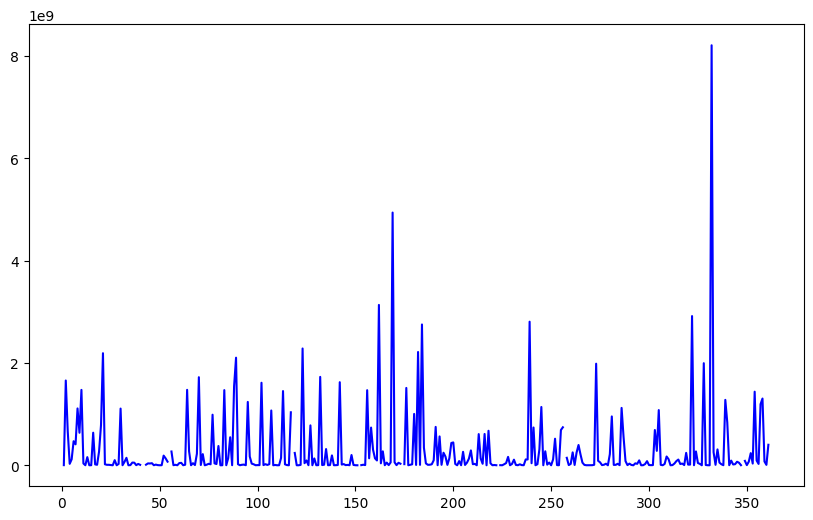

In [153]:
plt.figure(figsize=(10, 6))
plt.plot(data['secure_internet_servers_total'], color='blue')

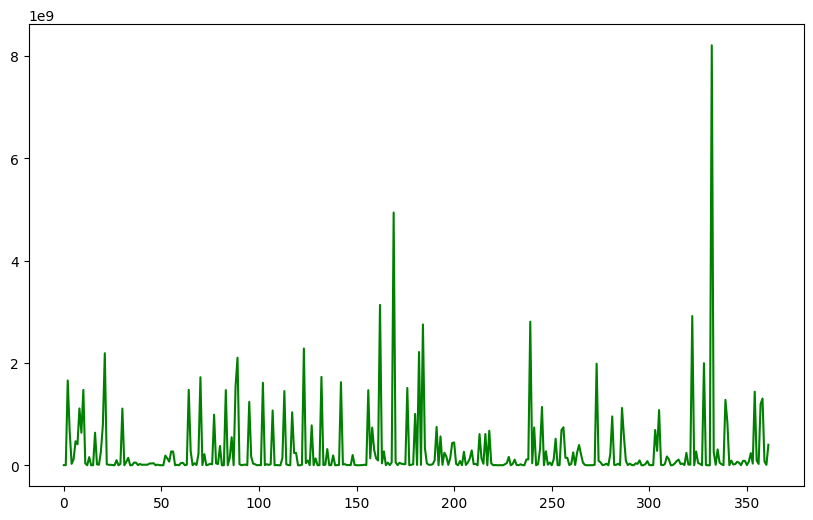

In [154]:
# since we have missing values in secure_internet_servers_total column
# we will use backward fill to fill missing values

data['secure_internet_servers_total'] = data['secure_internet_servers_total'].bfill()

plt.figure(figsize=(10, 6))
plt.plot(data['secure_internet_servers_total'], color='green')

Text(0.5, 1.0, 'Inflation Annual After Filling Missing Values')

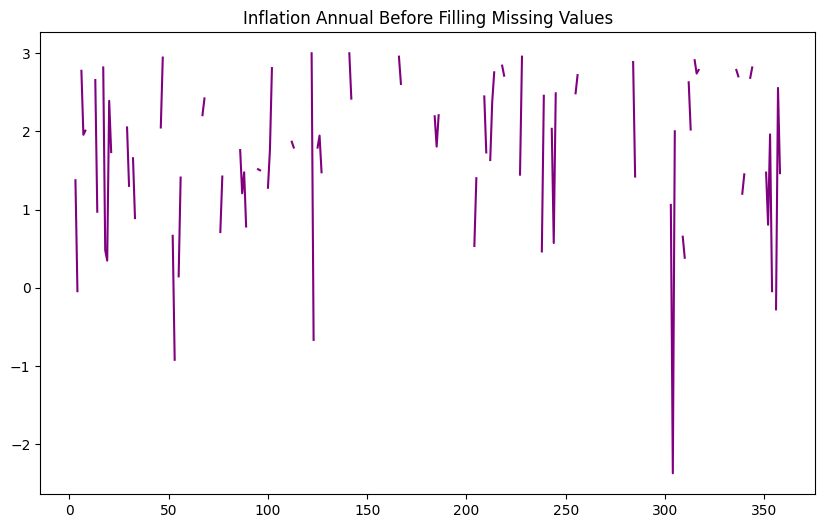

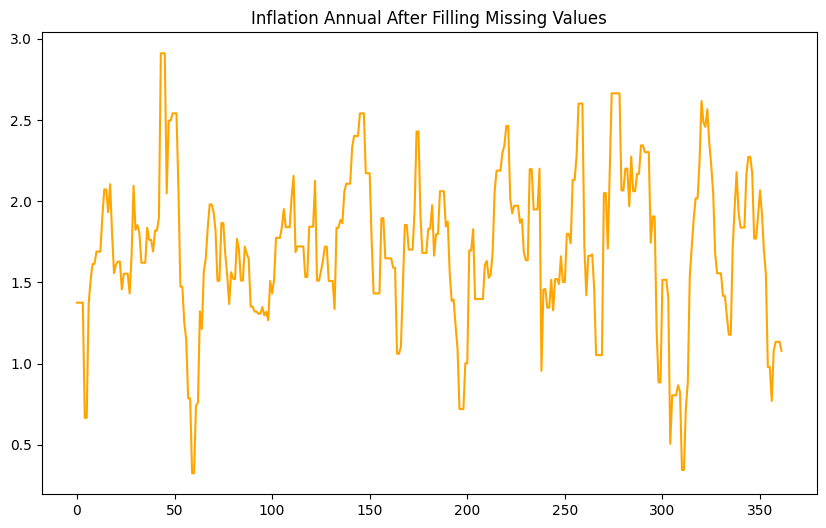

In [155]:
plt.figure(figsize=(10, 6))
plt.plot(data['inflation_annual'], color='purple')
plt.title('Inflation Annual Before Filling Missing Values')

# using local mean to fill missing values in inflation_annual column with window size of 10
data['inflation_annual'] = data['inflation_annual'].rolling(window=10, min_periods=1).mean()

# use backward fill to fill remaining missing values
data['inflation_annual'] = data['inflation_annual'].bfill()

plt.figure(figsize=(10, 6))
plt.plot(data['inflation_annual'], color='orange')
plt.title('Inflation Annual After Filling Missing Values')


Text(0.5, 1.0, 'Inflation Monthly After Filling Missing Values')

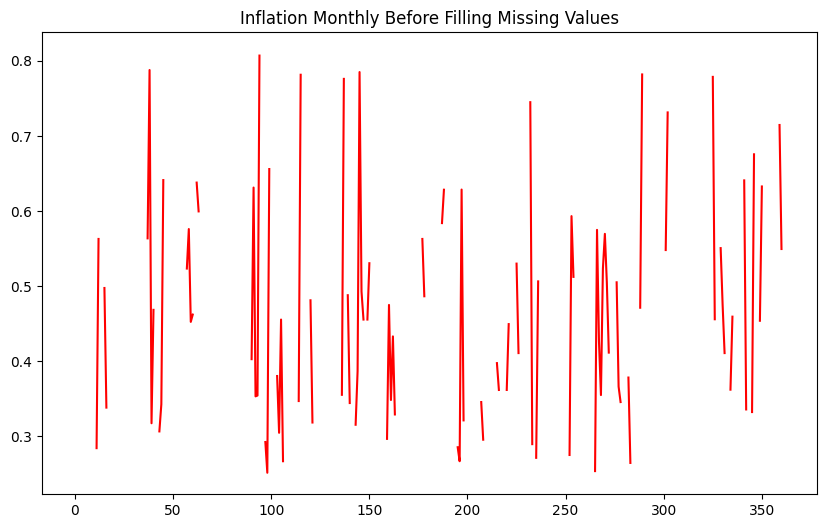

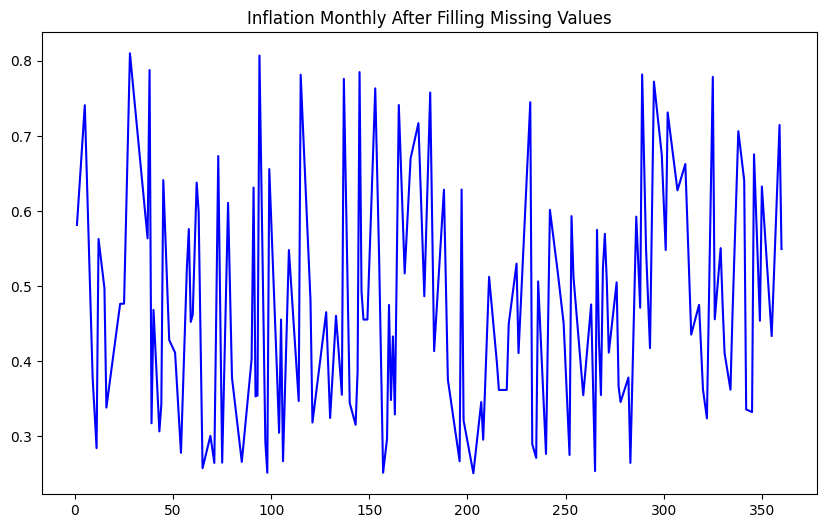

In [156]:
data_copy = data.copy()

plt.figure(figsize=(10, 6))
plt.plot(data_copy['inflation_monthly'], color='red')
plt.title('Inflation Monthly Before Filling Missing Values')

# using local mean to fill missing values in inflation_monthly column with window size of 10
data_copy['inflation_monthly'] = data_copy['inflation_monthly'].interpolate(method='slinear', limit_area='inside', limit=20)

plt.figure(figsize=(10, 6))
plt.plot(data_copy['inflation_monthly'], color='blue')
plt.title('Inflation Monthly After Filling Missing Values')

In [157]:
# as we can see from the plot, interpolation is better than using local mean to fill missing values
# so we will use interpolation to fill missing values in inflation_monthly column

data['inflation_monthly'] = data['inflation_monthly'].interpolate()

# fill missing values in inflation_monthly column using backward fill
data['inflation_monthly'] = data['inflation_monthly'].bfill()

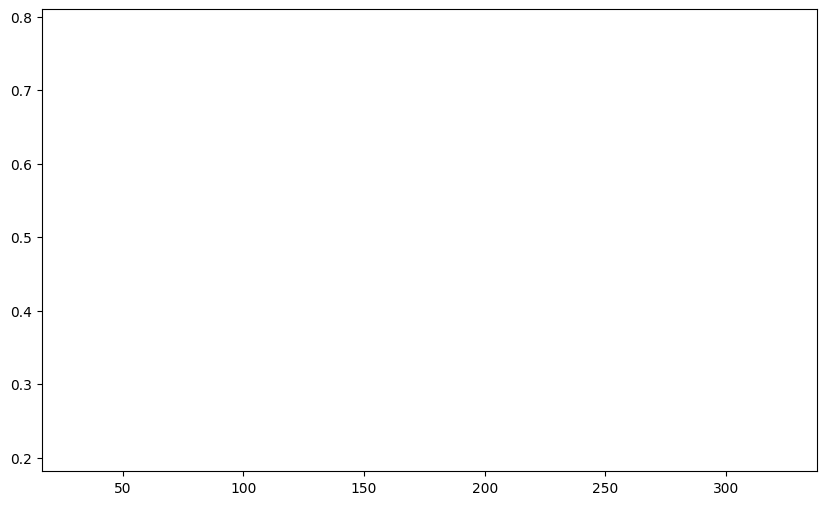

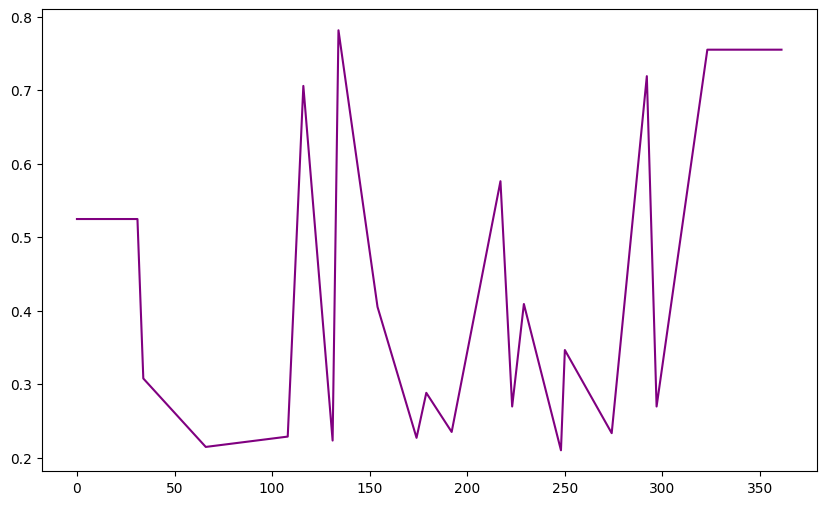

In [158]:
plt.figure(figsize=(10, 6))
plt.plot(data['inflation_weekly'], color='green')

# fill missing values in inflation_monthly column using interpolation
data['inflation_weekly'] = data['inflation_weekly'].interpolate()

# fill missing values in inflation_monthly column using backward fill
data['inflation_weekly'] = data['inflation_weekly'].bfill()

plt.figure(figsize=(10, 6))
plt.plot(data['inflation_weekly'], color='purple')


In [159]:
data.isnull().sum()

Unnamed: 0                       0
surface_area                     0
agricultural_land                0
forest_area                      0
armed_forces_total               0
urban_pop_major_cities           0
urban_pop_minor_cities           0
national_income                  0
inflation_annual                 0
inflation_monthly                0
inflation_weekly                 0
mobile_subscriptions             0
internet_users                   0
secure_internet_servers_total    0
improved_sanitation              0
women_parliament_seats_rate      0
life_expectancy                  0
dtype: int64

In [160]:
# handling categorical data
le = LabelEncoder()

data['national_income'] = le.fit_transform(data['national_income'])
data['national_income'] = data['national_income'].astype('float64')

data['internet_users'] = le.fit_transform(data['internet_users'])
data['internet_users'] = data['internet_users'].astype('float64')

data['mobile_subscriptions'] = le.fit_transform(data['mobile_subscriptions'])
data['mobile_subscriptions'] = data['mobile_subscriptions'].astype('float64')

data['improved_sanitation'] = le.fit_transform(data['improved_sanitation'])
data['improved_sanitation'] = data['improved_sanitation'].astype('float64')

data['women_parliament_seats_rate'] = le.fit_transform(data['women_parliament_seats_rate'])
data['women_parliament_seats_rate'] = data['women_parliament_seats_rate'].astype('float64')

In [161]:
# Convert unknown in internet_uses to -1
data['internet_users'] = data['internet_users'].replace('unknown', -1)

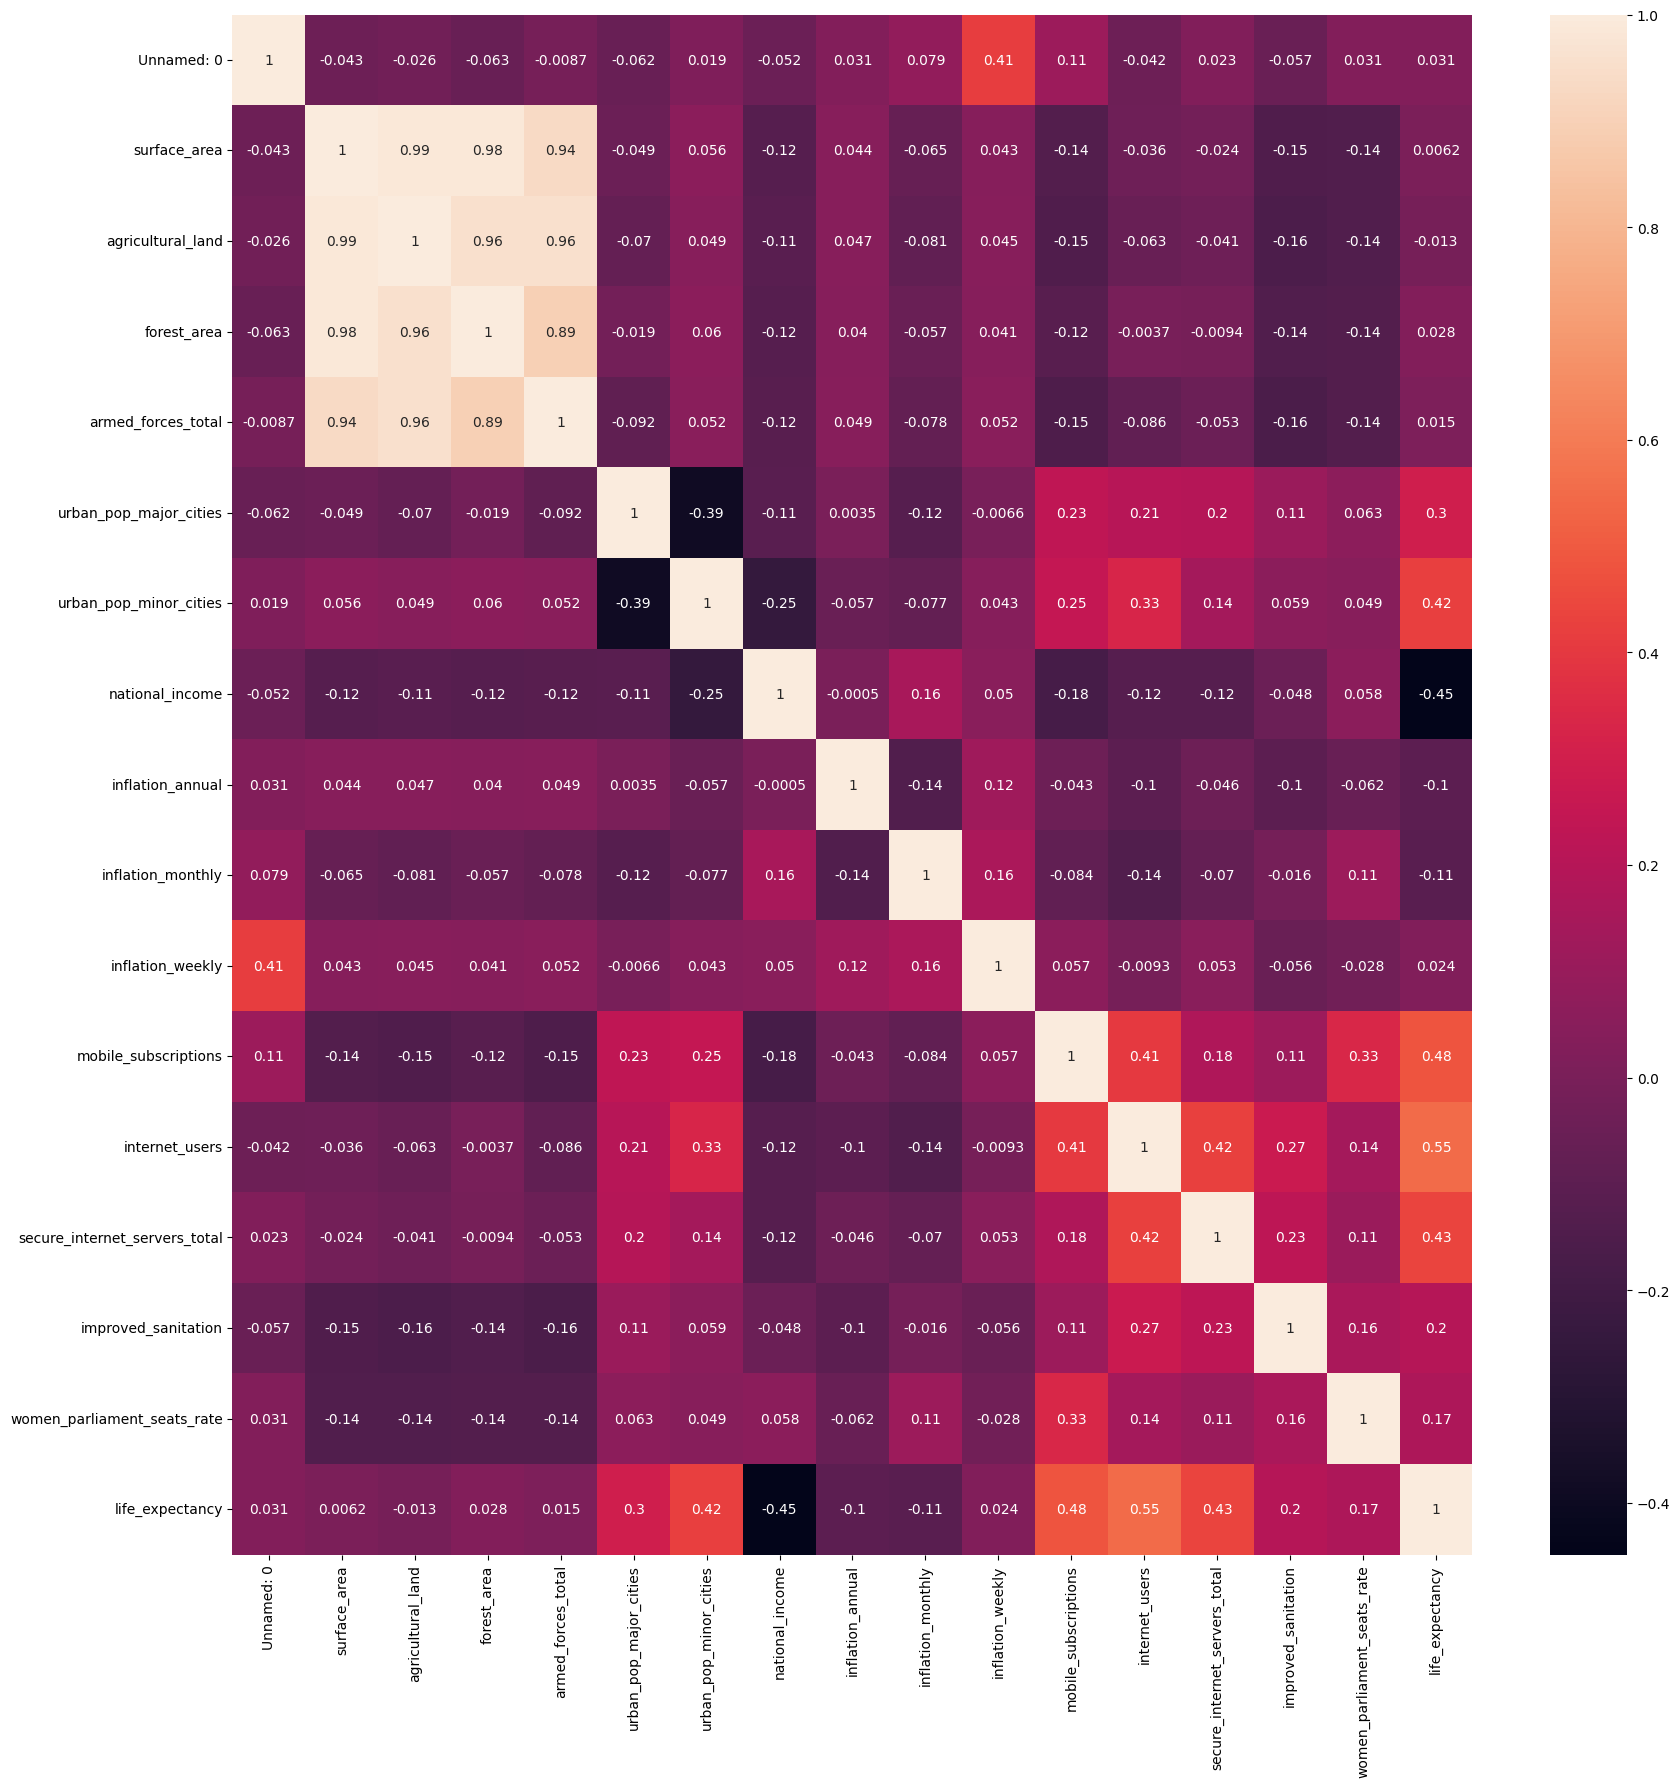

In [162]:
corr = data.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()


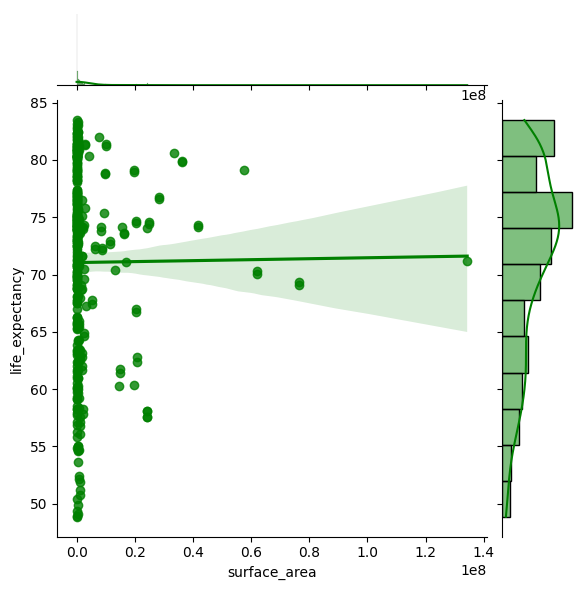

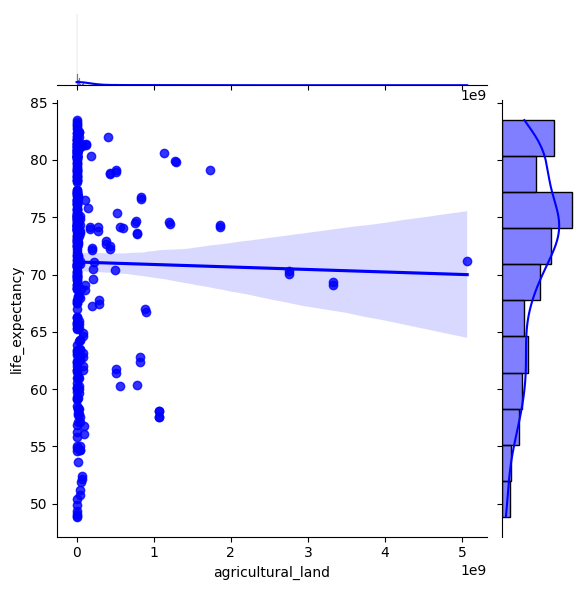

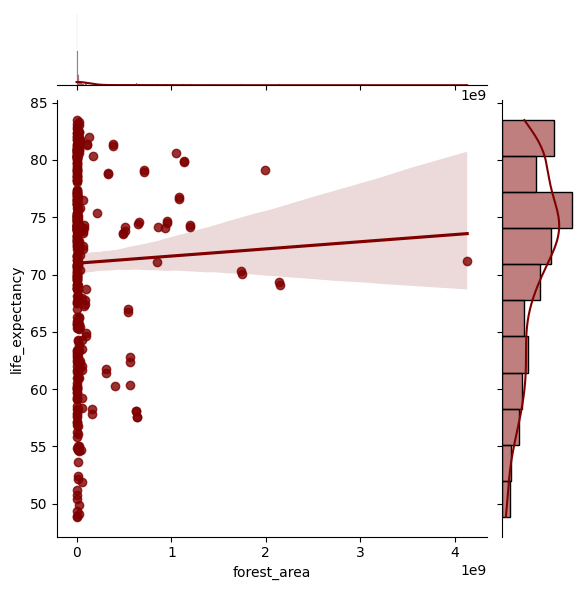

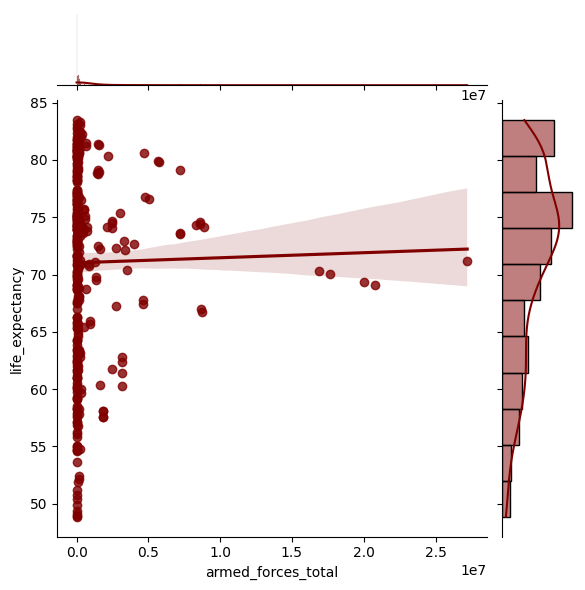

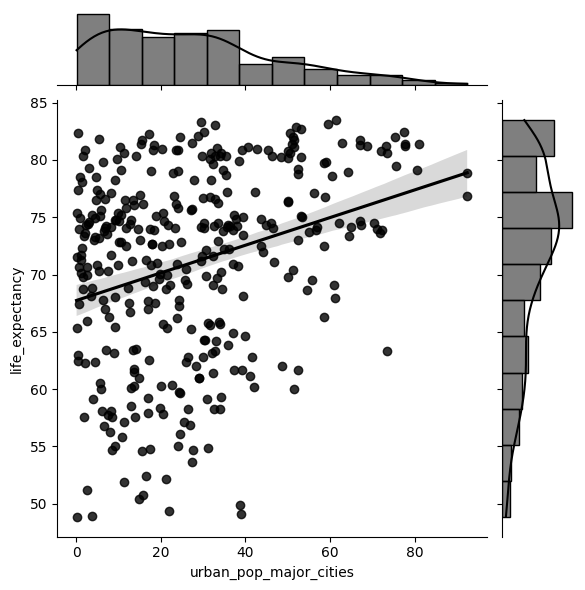

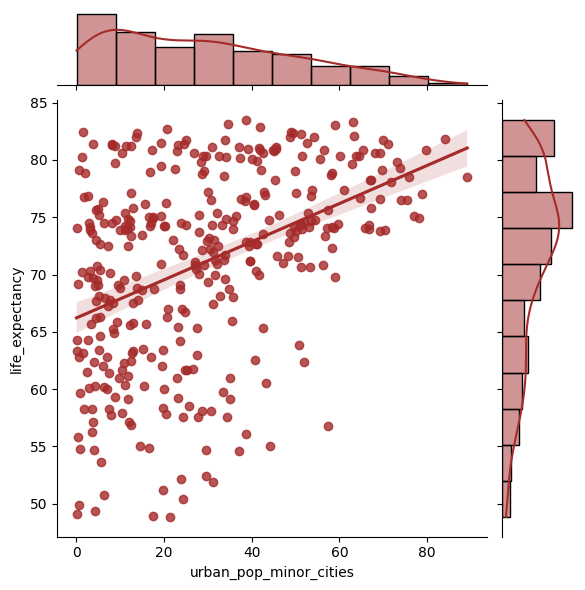

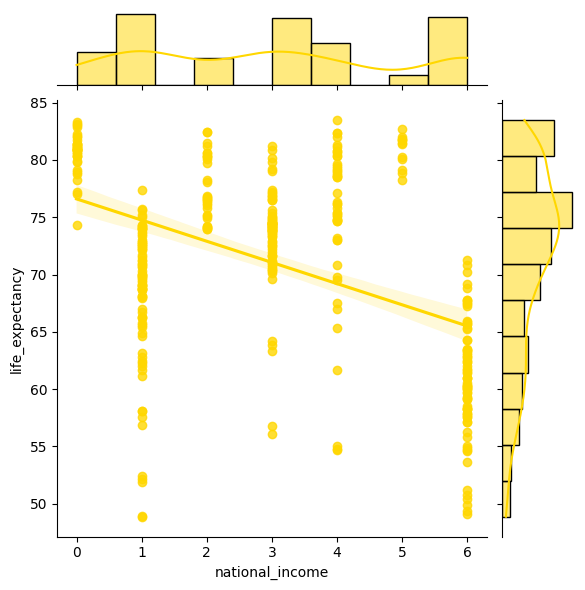

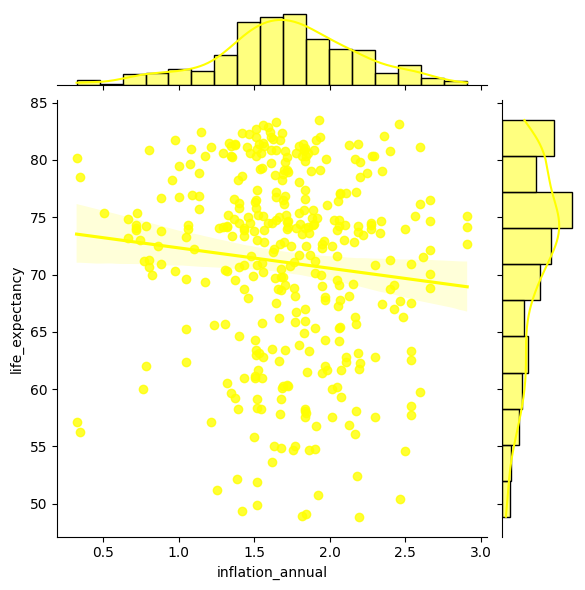

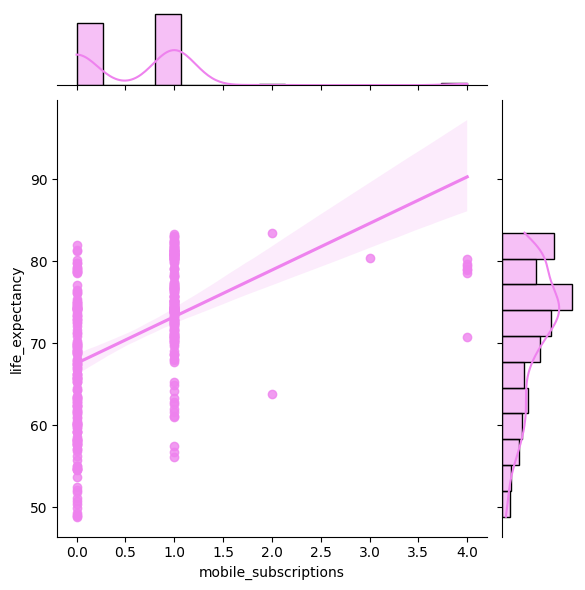

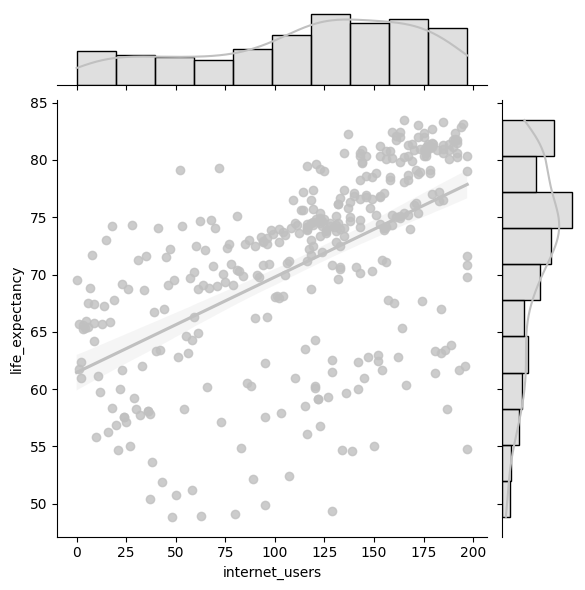

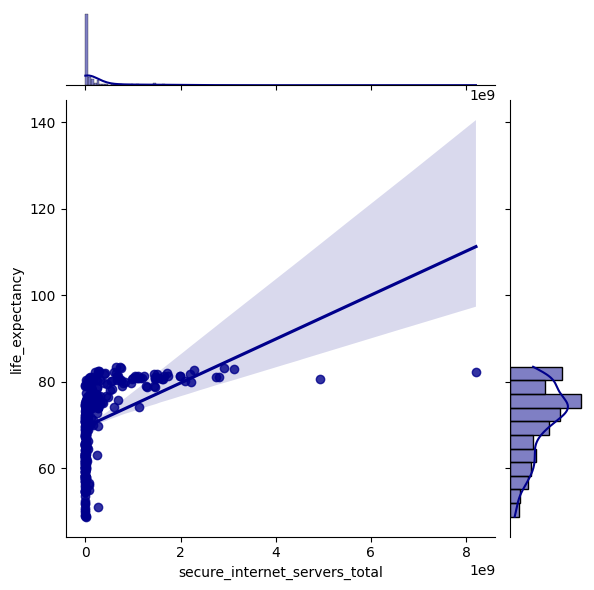

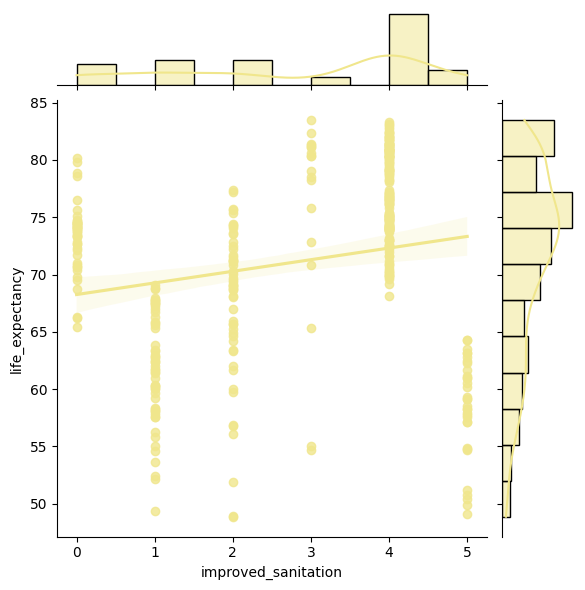

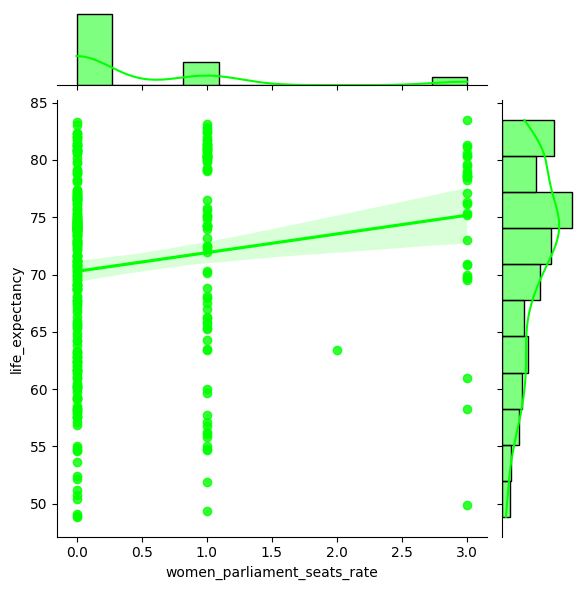

In [163]:
sns.jointplot(y='life_expectancy', x='surface_area', data=data, kind='reg', color='green')
sns.jointplot(y='life_expectancy', x='agricultural_land', data=data, kind='reg', color='blue')
sns.jointplot(y='life_expectancy', x='forest_area', data=data, kind='reg', color='maroon')
sns.jointplot(y='life_expectancy', x='armed_forces_total', data=data, kind='reg', color='maroon')
sns.jointplot(y='life_expectancy', x='urban_pop_major_cities', data=data, kind='reg', color='black')
sns.jointplot(y='life_expectancy', x='urban_pop_minor_cities', data=data, kind='reg', color='brown')
sns.jointplot(y='life_expectancy', x='national_income', data=data, kind='reg', color='gold')
sns.jointplot(y='life_expectancy', x='inflation_annual', data=data, kind='reg', color='yellow')
sns.jointplot(y='life_expectancy', x='mobile_subscriptions', data=data, kind='reg', color='violet')
sns.jointplot(y='life_expectancy', x='internet_users', data=data, kind='reg', color='silver')
sns.jointplot(y='life_expectancy', x='secure_internet_servers_total', data=data, kind='reg', color='darkblue')
sns.jointplot(y='life_expectancy', x='improved_sanitation', data=data, kind='reg', color='khaki')
sns.jointplot(y='life_expectancy', x='women_parliament_seats_rate', data=data, kind='reg', color='lime')
plt.show()

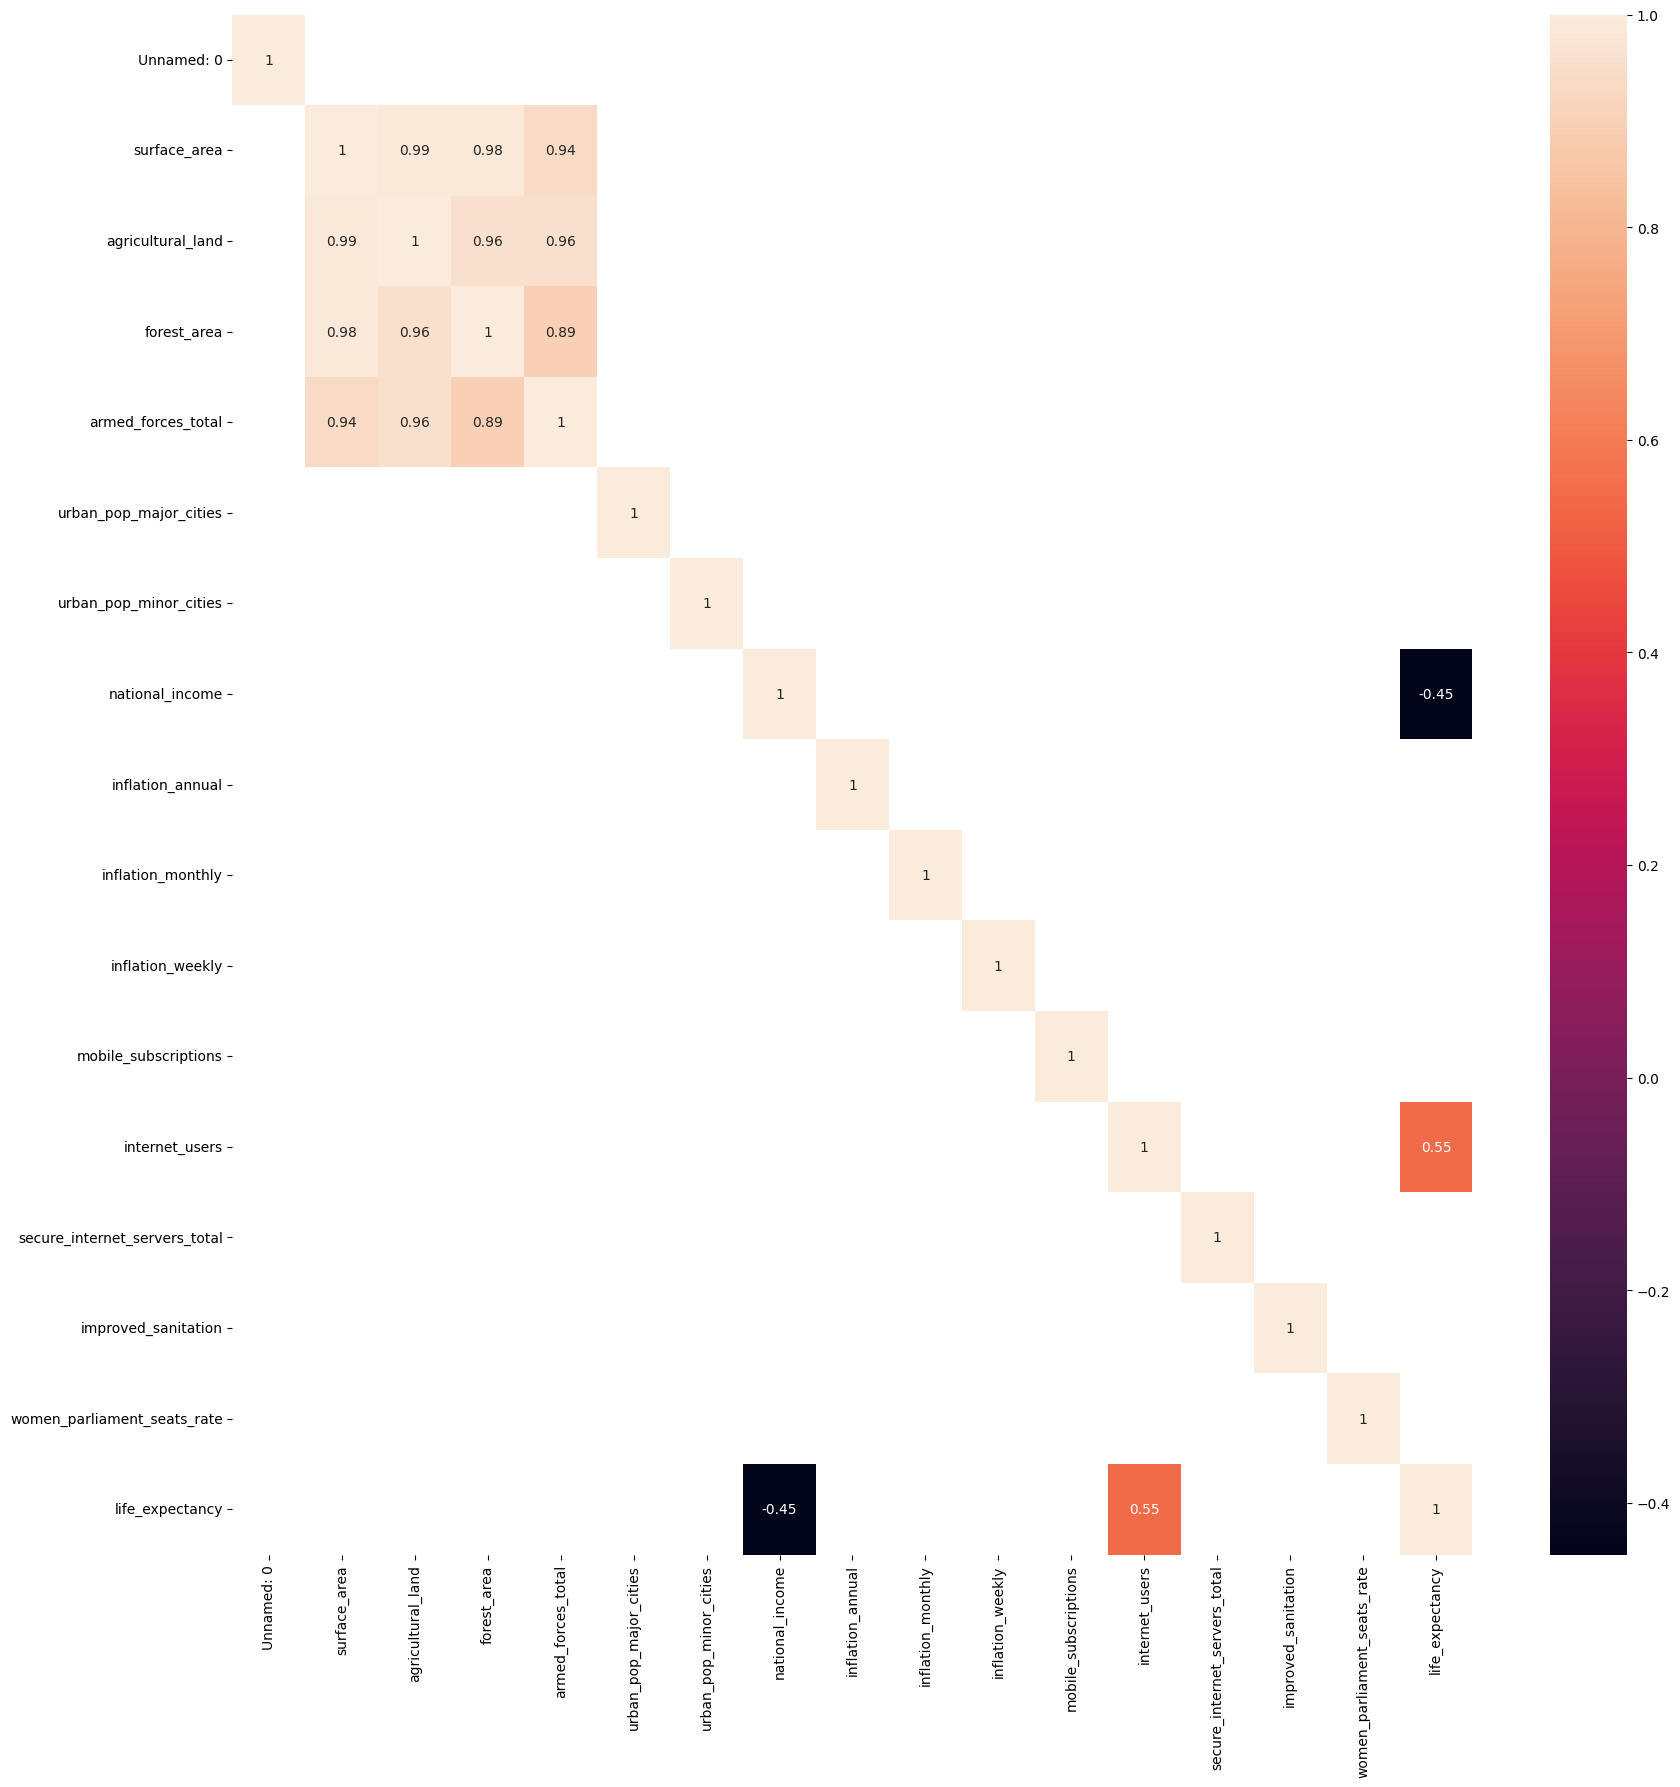

In [164]:
# Correlation heatmap where correlation value is greater than or eual to +0.5 and less than or equal to -0.4
corr = data.corr()
corr = corr[(corr >= 0.5) | (corr <= -0.4)]
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()


<Figure size 1000x1000 with 0 Axes>

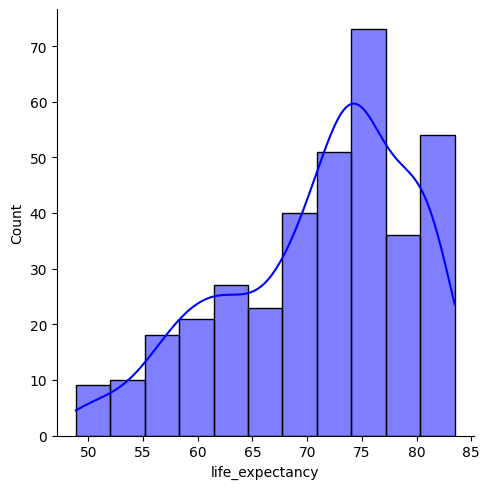

In [165]:
# distribution plot for life_expectancy
plt.figure(figsize=(10, 10))
sns.displot(data['life_expectancy'], color='blue', kde=True) 
plt.show()


In [166]:
data_copy = data.copy()

data_copy.drop(['agricultural_land', 'forest_area', 'inflation_monthly', 'inflation_weekly', 'Unnamed: 0'], axis=1, inplace=True)

print(data_copy.shape)
data_copy.head()


(362, 12)


,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,1.379000e+06,55.747169,4.688831,4.0,1.374906,0.0,0.0,2.623624e+06,0.0,0.0,69.494195
1,752610.0,1.650000e+04,16.890687,23.136313,6.0,1.374906,0.0,29.0,2.623624e+06,1.0,0.0,59.237366
2,1396.0,1.027774e+04,18.390090,23.139910,4.0,1.374906,1.0,185.0,1.656589e+09,3.0,3.0,81.300000
3,2758812.0,1.518650e+06,50.966885,24.522427,0.0,1.374906,1.0,169.0,6.625072e+08,4.0,1.0,81.373197
4,340.0,1.005109e+04,5.311885,30.271115,4.0,0.665339,1.0,96.0,2.832808e+07,4.0,1.0,73.193561


In [167]:
# Standardize data
# Columns not to be standardized. These are columns with categorical data,
# also we don't standardize our target vraiable
cols = ['national_income', 'mobile_subscriptions', 'life_expectancy',
        'improved_sanitation', 'women_parliament_seats_rate']

# Pick remaining columns and standardize them
data_copy = data_copy.drop(cols, axis=1)

scaler = StandardScaler()
data_copy = scaler.fit_transform(data_copy)

In [168]:
# now we will standardize the columns in original data from data_copy
data_copy = pd.DataFrame(data_copy, columns=['surface_area', 'armed_forces_total', 'urban_pop_minor_cities',
                                             'urban_pop_major_cities', 'inflation_annual', 'internet_users',
                                             'secure_internet_servers_total'])

# Add back the columns that were not standardized
data_copy = pd.concat([data_copy, data[cols]], axis=1)

In [169]:
# Train Test Split

# train test split
data_copy.drop('life_expectancy', axis=1, inplace=True)

X = data_copy
y = data['life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set Dimensions: ", X_train.shape, y_train.shape)
print("Testing Set Dimensions: ", X_test.shape, y_test.shape)

Training Set Dimensions:  (289, 11) (289,)
Testing Set Dimensions:  (73, 11) (73,)


In [170]:
# Train Random Forest Regressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Measure mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, rf.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, rf.predict(X_test)))


Mean Absolute Error: 2.6889105234732837
R2 Score: 0.7460235704270254
Mean Absolute Error for Training Set: 1.0227090558140048
Mean Absolute Error for Test Set: 2.6889105234732837


In [171]:
# Train xgboost regressor

xgb = XGBRegressor(n_estimators=200, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Measure mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, xgb.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, xgb.predict(X_test)))



Mean Absolute Error: 2.7331781296576683
R2 Score: 0.7465973451449635
Mean Absolute Error for Training Set: 0.0006731114189216834
Mean Absolute Error for Test Set: 2.7331781296576683


In [172]:
# Apply LightGBM Regressor

lgbm = LGBMRegressor(n_estimators=200, random_state=42)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Measure mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, lgbm.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, lgbm.predict(X_test)))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 653
[LightGBM] [Info] Number of data points in the train set: 289, number of used features: 11
[LightGBM] [Info] Start training from score 71.351171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [173]:
# Apply Bayesian Ridge Regressor

br = BayesianRidge()
br.fit(X_train, y_train)
y_pred = br.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Measure mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, br.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, br.predict(X_test)))


Mean Absolute Error: 4.274280390581515
R2 Score: 0.5952978546716847
Mean Absolute Error for Training Set: 3.7649960049600875
Mean Absolute Error for Test Set: 4.274280390581515


From the above models, we can see that the best model is LGBMRegressor 
as it achieved the lowest Mean Absolute Error (MAE) on the test set (2.542),
indicating better accuracy compared to the other models.

In [174]:
# From the above models, we can see that the best model is LGBMRegressor 
# as it achieved the lowest Mean Absolute Error (MAE) on the test set (2.542),
# indicating better accuracy compared to the other models.

In [175]:
# important features for random forest regressor
for name, importance in zip(data_copy.columns, rf.feature_importances_):
    print('feature:', name, "=", importance)

feature: surface_area = 0.03426126385247024
feature: armed_forces_total = 0.06910278221077783
feature: urban_pop_minor_cities = 0.02893304790745695
feature: urban_pop_major_cities = 0.05564403696874077
feature: inflation_annual = 0.017760263022457867
feature: internet_users = 0.0982370849632675
feature: secure_internet_servers_total = 0.5216904574344721
feature: national_income = 0.1419273602298833
feature: mobile_subscriptions = 0.007476928612671687
feature: improved_sanitation = 0.017505998938687494
feature: women_parliament_seats_rate = 0.007460775859114402


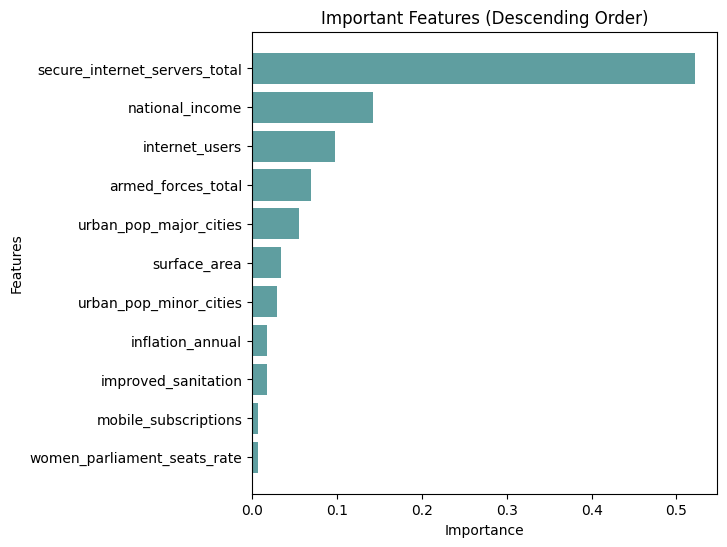

In [176]:
# Sample data
features = data_copy.columns  # Assuming these are your feature names
importances = rf.feature_importances_  # Assuming these are your feature importances from a RandomForest model

# Sort the features and importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = [importances[i] for i in sorted_indices]

# Create horizontal bar graph in descending order
plt.figure(figsize=(6, 6))
plt.barh(sorted_features, sorted_importances, color='cadetblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Important Features (Descending Order)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()